// Assignment 04
vt9438
Varun Tandon

## STEP 0: Importing libraries

In [45]:
# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
from sklearn import datasets

# Common imports
import numpy as np
import os
import pandas

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# STEP 1: Download the data

In [46]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']
iris = pandas.read_csv(url, names=names)

# STEP 2: Data manipulation and analysis

In [47]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


There doesn't seem to be any data missing. 

In [49]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

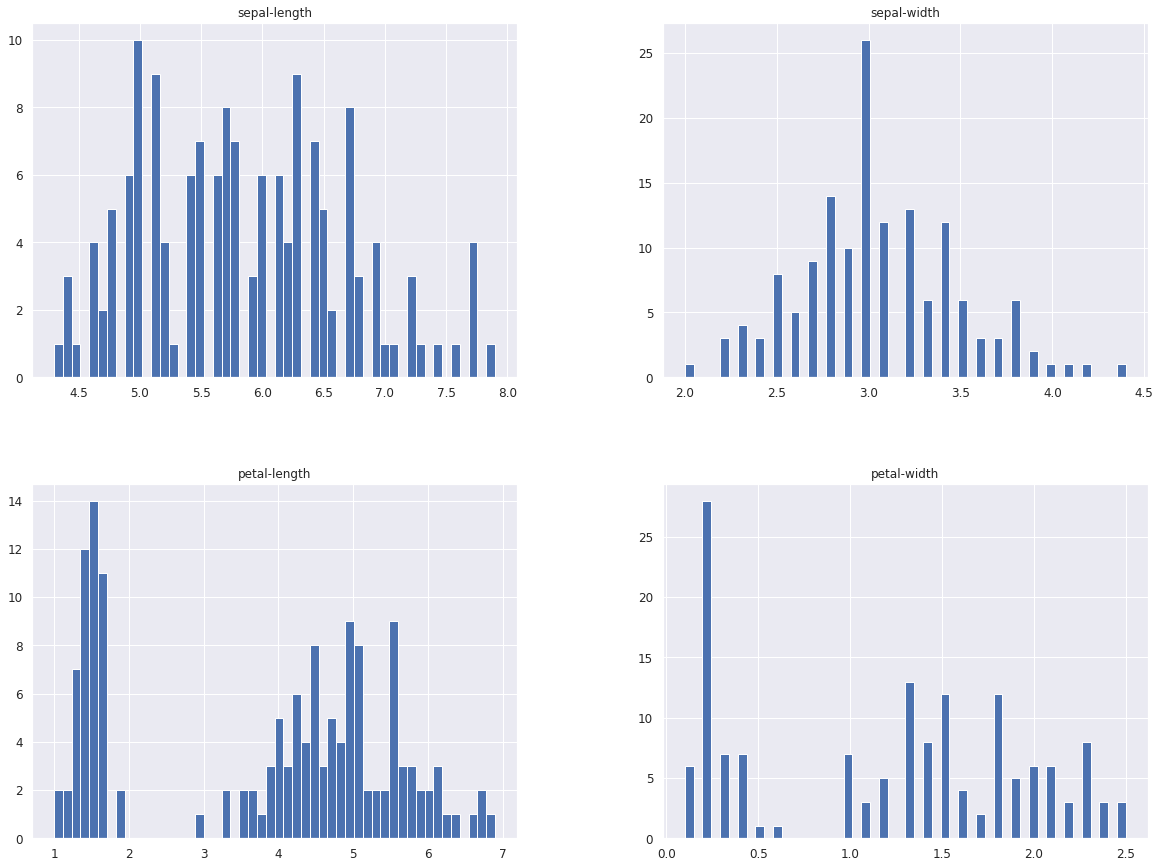

In [50]:
iris.hist(bins=50, figsize=(20,15))
plt.show()

We can see that the petal-length and petal-width do not follow the normal distribution

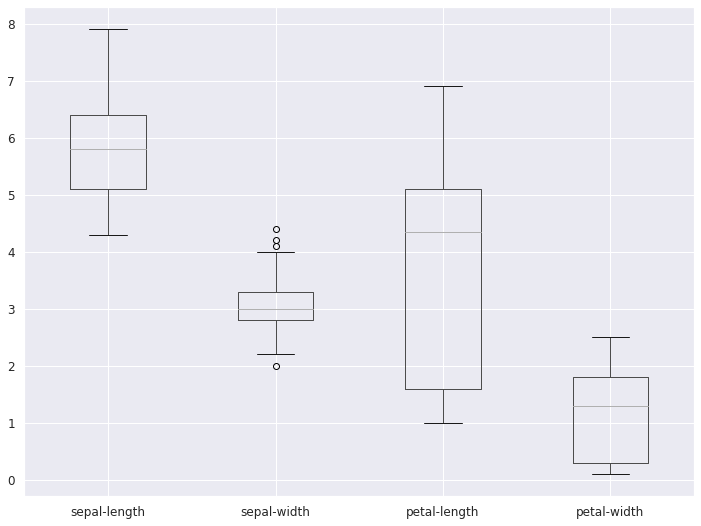

In [51]:
iris.boxplot(figsize=(12,9))
plt.show()

Here we see that the distribution for sepal-length and sepal-width lie normally, and the mean for petal-length and petal-width is skewed. There are some outliers present in the sepal-width distribution.

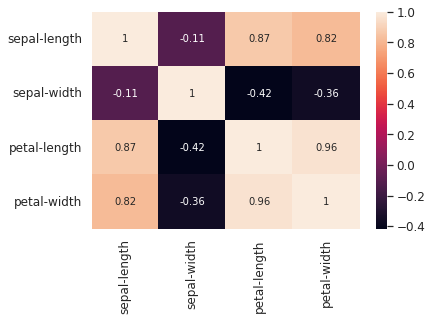

In [52]:
import seaborn as sn

iris_cor = iris.corr()
sn.heatmap(iris_cor, annot=True)
plt.show()

Here we can see that petal-length and petal-width have a high correlation with sepal-length. Petal-length and petal-width have the highest correlation with each other.

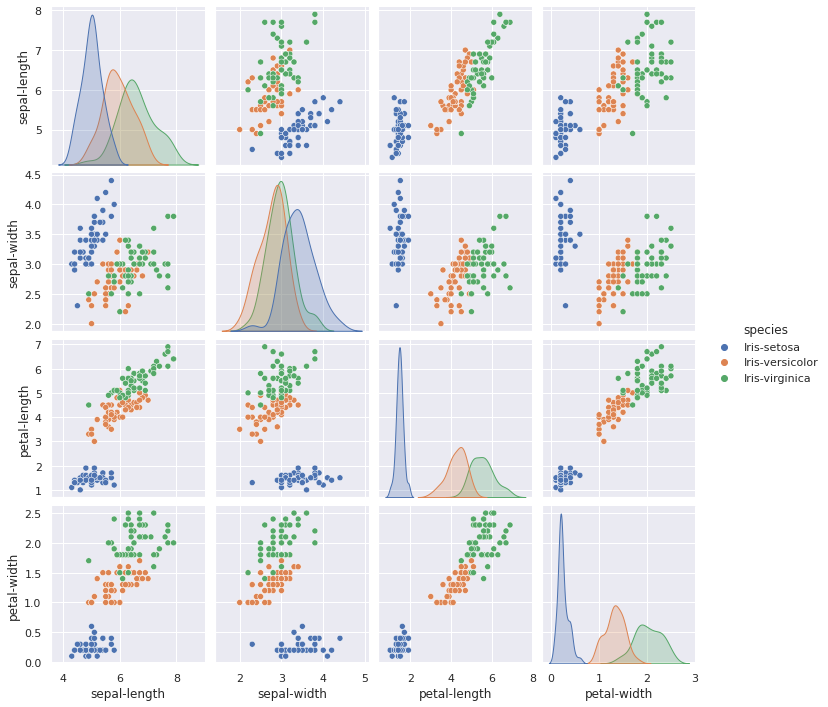

In [53]:
sn.set()
sn.pairplot(iris[['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']],
             hue="species", diag_kind="kde")

This gives us an idea of how well setosa can be classified. In all possible correlations, we see that it can be classified very easily. Versicolor and virginica are also distinct enough to be classified easily, however in the correlation between sepal-length and sepal-width, the datapoints seem to mix.

# STEP 3,4: Standardization and train/test split:

In [54]:
spec = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data = [iris]
  
for dataset in data:
    dataset['species'] = dataset['species'].map(spec)

This is done to make the column with object or string types machine readable 

In [55]:
y = iris['species']
X = iris.drop(['species'], axis=1)

# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)
y


(150, 4)
(150,)


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


Scalar transformation done to keep the range of the datapoints similar. Here, the datapoints aren't changing, but the scale of the plot of these points is changed to a more standard or normal version.

In [57]:
spec = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data = [iris]

for dataset in data:
    dataset['species'] = dataset['species'].map(spec)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Here we split the dataset into train and test sets with a 80/20 ratio.

# SVM CLASSIFICATION:

In [59]:
from sklearn.svm import SVC
from sklearn import metrics

# linear kernel

svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score for linear SVM:')
print(metrics.accuracy_score(y_test,y_pred))



Accuracy Score for linear SVM:
0.9666666666666667


In [60]:
from sklearn.metrics import mean_squared_error

rmse_linear = mean_squared_error(y_test, y_pred, squared=False) 
print("Rms error for linear SVM: ")
rmse_linear

Rms error for linear SVM: 


0.18257418583505536

In [61]:
# rbf kernel

svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score for rbf kernel SVM:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score for rbf kernel SVM:
0.9666666666666667


In [62]:
rmse_rbf = mean_squared_error(y_test, y_pred, squared=False) 
print("rms error for rbf kernel SVM:")
rmse_rbf

rms error for rbf kernel SVM:


0.18257418583505536

Using GridSearchCV for optimization:

In [63]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.917, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.833, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.750, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.917, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.833, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.792, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.792, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.917, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.917, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.958, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.833, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.4s finished


Here, c=10 and gamma=0.1 return as the best values after hyper parameter tuning

The accuracy score of the model is 0.966

# KNN CLASSIFICATION

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy score for knn with k = 9:")
print(metrics.accuracy_score(y_test, y_pred))

Accuracy score for knn with k = 9:
1.0


In [65]:
rmse_linear = mean_squared_error(y_test, y_pred, squared=False) 
print("rms error for knn with k = 9")
rmse_linear

rms error for knn with k = 9


0.0

In [66]:
from sklearn.model_selection import RandomizedSearchCV

k_range = list(range(1,21))
weight_options=['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X_train, y_train)

print(rand.best_params_)
print(rand.best_estimator_)

rand_predictions = rand.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,rand_predictions))



{'weights': 'uniform', 'n_neighbors': 12}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')
Accuracy Score:
1.0


Here, the accuracy of the model after RandomizedSearchCV is 1.0

// end of Assignment 04 vt9438